# geolocation

- formulation of a solver.

- statistical simulations in order to determine sources of uncertainty

---

## formulation

<img src='schematic.jpeg' alt='Drawing' align='right' style='width: 300px;'/>

We want to find the float horizontal position $\underline{x}=(x,y)$ of an underwater float 
given a number of **known variables**:
- $\underline{x}_s^i$ : source surface float horizontal position
- $t_e^i$ : time of emission for source $i$
- $\tilde{t}_r^i$ : time of reception of the signal emitted by source $i$ by the underwater float
- $\epsilon_i$ : signal detection, $\epsilon_i=1$ (detection) or $1$ (no detection)
- $z$ : underwater float depth(perfect knowledge), not used for now

'Perfect' knowledge is assumed for known variables wich amounts to say potential errors on there
estimates may be neglected.

**Unknown variables** are:
- $\underline{x}=(x,y)$ : underwater float position
- $\delta t$ : underwater float clock offset, $\delta t = \tilde{t}_r^i - t_r^i$, where 
$t_r^i$ is the true time of reception
- $\delta \underline{x}^i$ : vector difference between source $i$ transducer position and surface float position, $\delta \underline{x}^i = \underline{x}_t^i - \underline{x}_s^i$
- $\delta c (\underline{x},\underline{x}_t^i)$ : difference between equivalent celerity defined as 
$c(\underline{x},\underline{x}_t^i) = ||\underline{x} - \underline{x}_t^i ||/(t_r^i - t_e^i)$ and its background (a priori) estimate $c_b$, $\delta c (\underline{x},\underline{x}_t^i) = c(\underline{x},\underline{x}_t^i) - c_b$.

A priori standard deviations for $\underline{x}$, $\delta t$, $\delta \underline{x}^i$, $\delta c (\underline{x},\underline{x}_t^i)$ are
assumed to be known and given by: $e_x$, $e_{\delta t}$, $e_{\delta x}$, $e_{\delta c}$.

Background (a priori) estimates for $\underline{x}$, $\delta t$, $\delta \underline{x}^i$, $\delta c (\underline{x},\underline{x}_t^i)$ may eventually be provided. We assume all are 0 for now except
for the float position $\underline{x}_b=(x=1km, y=0km)$.


We impose **hard contraints** for each source-float acoustic travel:

$$
\begin{align*}
||\underline{x} - \underline{x}_s^i - \delta \underline{x}^i || = \big (c_b + \delta c(\underline{x},\underline{x}_t^i) \big ) \times (\tilde{t}_r^i + \delta t - t_e^i),
\end{align*}
$$

The estimate of the underwater float position $\underline{\hat{x}}$ minimizes:

$$
\begin{align*}
J(\mathbf{x}, \delta t, \delta \underline{x}_i, \delta c (\underline{x},\underline{x}_t^i)) = 
||\underline{x} - \underline{x}_b||^2 /e_x^2
+ \delta t^2 / e_{\delta t}^2 
+ \sum_i \epsilon_i \times ( ||\delta \underline{x}_i||^2 / e_{\delta x}^2
+ \delta c (\underline{x},\underline{x}_t^i)^2 / e_c^2 )
\end{align*}
$$

subject to the hard constraints listed above.

We assume $\epsilon_i=1$ in all examples below for simplicity.

We have assumed simultaneous (working assumption) emission of sources.
The underwater float velocity may be added as an extra variable (future addition).

In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt

from clib.geolocation import *


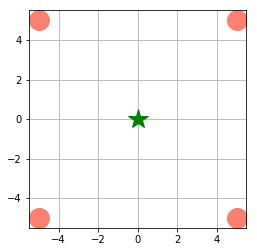

In [2]:
        
### create an ensemble of sources

# square formation:
dx=10. *1.e3 # in meters
sources=[]
sources.append(source(-dx*.5,-dx*.5))
sources.append(source(dx*.5,-dx*.5))
sources.append(source(dx*.5,dx*.5))
sources.append(source(-dx*.5,dx*.5))
#sources.append(source(0.,dx*.25))
Ns = len(sources)

### init a receiver
r=receiver(0. *1.e3, 0. *1.e3)

### plot
plt.figure()
ax=plt.subplot(111)
[s.plot() for s in sources]
r.plot()
ax.grid()
#ax.set_xlim([-1.,21.])
#ax.set_ylim([-1.,11.])
ax.set_aspect('equal')
plt.show()


In [3]:
for i, s in enumerate(sources):
    print('Distance source %d - float = %.2f km' %(i, dist(s,r)/1.e3))
    print('  horizontal offset for a sound celerity difference of %.1f m/s = %.2f m' %(10., dist(s,r)*10./1500.))

Distance source 0 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 1 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 2 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 3 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m


---

## Demo case



In [4]:
#[s.draw_celerity(10.) for s in sources]
#[s.draw_dxdy(10.) for s in sources]
r.draw_clock_drift(1.)

The true underwater float position and clock offset are:

In [5]:
print('x = %.1f m \ny = %.1f m \ndt = %.1e s' %(r.x, r.y, r.dt))

x = 0.0 m 
y = 0.0 m 
dt = 4.0e-01 s


We solve the geolocation problem with the a priori uncertainties and estimates :

In [6]:
# a priori uncertainties : 
print("e_c  = %.1f m/s  (celerity)" %s.e_c)
print("e_dt = %.1f s  (clock drift)" %r.e_dt)
print("e_x  = %.1f m  (underwater float position)" %r.e_x)
print("e_dx = %.1f m  (dx between transducer and surface float)" %s.e_dx)

e_c  = 10.0 m/s  (celerity)
e_dt = 1.0 s  (clock drift)
e_x  = 10000.0 m  (underwater float position)
e_dx = 10.0 m  (dx between transducer and surface float)


In [7]:
# a priori estimates :
x0 = np.zeros((3+3*Ns))
# a priori position :
x0[0] = 1.e3
x0[1] = 0.e3 

In [24]:
from clib.geolocation import *
geolocalize_xydt(r, sources,x0 = x0)

ftol = 1e-06
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: 0.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
source 1 : 19612915.9
[ 1.20000000e+04  1.00000000e+04 -1.92998383e+07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
source 2 : -715557.8
[-8.00000000e+03  1.00000000e+04 -1.93762747e+07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
source 3 : -816502.5
[-8.00000000e+03 -1.00000000e+04 -1.93997042e+07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+0

(1000.0, 0.0, 0.0, False, 'Singular matrix C in LSQ subproblem',      fun: 0.0
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  message: 'Singular matrix C in LSQ subproblem'
     nfev: 1
      nit: 1
     njev: 1
   status: 6
  success: False
        x: array([1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.]))

In [22]:
# geolocation problem resolution :
x_hat, y_hat, dt_hat, dx_hat, dy_hat, dc_hat, success, message, res = geolocalize(r, sources,x0 = x0, disp=False)
print("Optimizer exited successfully :", success)
print("Cause of the termination :", message)
x, y, dt, dx, dy, dc = r.x, r.y, r.dt, [s.dx for s in sources], \
                       [s.dy for s in sources] , [s.c - s.c_b for s in sources]
print ("True values :")
print('x = %.1fm    y = %.1fm    dt = %.1es' %(x, y, dt))
print('dc = ', np.array(dc)[:,0])
print('dx = ',np.array(dx)[:,0])
print('dy = ',np.array(dy)[:,0])
print ("\nEstimated values :")
print('x_hat=%.1fm    y_hat = %.1fm    dt_hat = %.1es' %(x_hat, y_hat, dt_hat))
print('dc_hat = ',np.array(dc_hat))
print('dx_hat = ',np.array(dx_hat))
print('dy_hat = ',np.array(dy_hat))


ftol = 1e-02
source 1 : 54.8
[ 9.98968128e+03  9.96302305e+03 -2.11896224e+07 -9.98968128e+03
 -9.96302305e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.62685608e+04
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
source 2 : 56.9
[-1.00103146e+04  9.96314099e+03 -2.11572887e+07  0.00000000e+00
  0.00000000e+00  1.00103146e+04 -9.96314099e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.65775042e+04  0.00000000e+00  0.00000000e+00]
source 3 : 57.2
[-1.00101987e+04 -1.00368938e+04 -2.12899836e+07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00101987e+04
  1.00368938e+04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.68966364e+04  0.00000000e+00]
source 4 : 54.3
[ 9.98978133e+03 -1.00369972e+04 -2.12158758e+07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.98978133e+03  1.00369972e+04  0.000000

In [17]:
res

     fun: 0.2125044896678868
     jac: array([ 0.00000000e+00,  0.00000000e+00,  8.16295426e-09,  5.13146840e-02,
        4.17711054e-02,  4.71573400e-02, -7.61764803e-02, -6.87172328e-02,
       -4.13482372e-02, -4.87384085e-02,  6.19864844e-02,  3.76737758e-02,
       -3.93772821e-02,  3.78460880e-02, -3.64068434e-02])
 message: 'Iteration limit exceeded'
    nfev: 10834
     nit: 1001
    njev: 1001
  status: 9
 success: False
       x: array([ -5.13370359, -18.46759179,   0.40814771,   0.02565734,
         0.02088555,   0.02357867,  -0.03808824,  -0.03435862,
        -0.02067412,  -0.0243692 ,   0.03099324,   1.88368879,
        -1.96886411,   1.8923044 ,  -1.82034217])

In [8]:
# geolocation problem resolution :
x_hat, y_hat, dt_hat, dx_hat, dy_hat, dc_hat, success, message = geolocalize(r, sources,x0 = x0, disp=False)

source 1 : 54.8
source 2 : 56.9
source 3 : 57.2
source 4 : 54.3


In [9]:
print("Optimizer exited successfully :", success)
print("Cause of the termination :", message)

Optimizer exited successfully : False
Cause of the termination : Iteration limit exceeded


We look at the differences between true and estimated values : 

In [10]:
x, y, dt, dx, dy, dc = r.x, r.y, r.dt, [s.dx for s in sources], \
                       [s.dy for s in sources] , [s.c - s.c_b for s in sources]

print ("True values :")
print('x = %.1fm    y = %.1fm    dt = %.1es' %(x, y, dt))
print('dc = ', np.array(dc)[:,0])
print('dx = ',np.array(dx)[:,0])
print('dy = ',np.array(dy)[:,0])


print ("\nEstimated values :")
print('x_hat=%.1fm    y_hat = %.1fm    dt_hat = %.1es' %(x_hat, y_hat, dt_hat))
print('dc_hat = ',np.array(dc_hat))
print('dx_hat = ',np.array(dx_hat))
print('dy_hat = ',np.array(dy_hat))



True values :
x = 0.0m    y = 0.0m    dt = 4.0e-01s
dc =  [ 9.57657758  4.57570351  1.17769814 -1.60956535]
dx =  [-15.8522194   14.35127608   3.52880379 -14.22591503]
dy =  [  4.12203544  -0.36487203  -0.36793304 -15.03787966]

Estimated values :
x_hat=-5.1m    y_hat = -18.5m    dt_hat = 4.1e-01s
dc_hat =  [ 1.88368879 -1.96886411  1.8923044  -1.82034217]
dx_hat =  [ 0.02565734  0.02357867 -0.03435862 -0.0243692 ]
dy_hat =  [ 0.02088555 -0.03808824 -0.02067412  0.03099324]


---

### Test on sensibility to a priori uncertainty on celerity

We keep initial celerity anomalies (true values). Uncertainty, true values and a priori values are not consistent anymore.


In [11]:
# a priori uncertainty :
for s in sources:
    s.e_c = .1

In [12]:
x_hat, y_hat, dt_hat, dx_hat, dy_hat, dc_hat, success, message = geolocalize(r, sources, disp=False)

print ("Optimizer exited successfully :", success)
print("Cause of the termination :", message)

print ("\nTrue values :")
print('x = %.1fm    y = %.1fm    dt = %.1es' %(x, y, dt))
print('dc = ', np.array(dc)[:,0])
print('dx = ',np.array(dx)[:,0])
print('dy = ',np.array(dy)[:,0])


print ("\nEstimated values :")
print('x_hat=%.1fm    y_hat = %.1fm    dt_hat = %.1es' %(x_hat, y_hat, dt_hat))
print('dc_hat = ',np.array(dc_hat))
print('dx_hat = ',np.array(dx_hat))
print('dy_hat = ',np.array(dy_hat))

source 1 : -31331801.8
source 2 : -50974667.9
source 3 : -6414067.7
source 4 : 13249929.9
Optimizer exited successfully : False
Cause of the termination : Iteration limit exceeded

True values :
x = 0.0m    y = 2000.0m    dt = -7.1e-01s
dc =  [-0.18826401  1.29580288  3.14349724  1.47946571]
dx =  [6.0473497  4.19093285 9.83926701 0.75050899]
dy =  [19.34350788 10.85344248 14.88914326  4.73974458]

Estimated values :
x_hat=998.7m    y_hat = 2.0m    dt_hat = -9.2e-03s
dc_hat =  [-3.46565176 -6.80752465  0.55911471  6.77588024]
dx_hat =  [-0.33523579  0.43860297 -0.07053498  1.28512024]
dy_hat =  [-0.2793633  -0.54825374 -0.08816867 -1.07093338]


---
### Test on sensibility to a priori uncertainty on clock drift

In [19]:
# a priori uncertainty :
for s in sources:
    s.e_c = 10
    s.e_dt = .01
    

In [20]:
x_hat, y_hat, dt_hat, dx_hat, dy_hat, dc_hat, success, message = geolocalize(r, sources, disp=False)

print ("Optimizer exited successfully :", success)
print("Cause of the termination :", message)

print ("\nTrue values :")
print('x = %.1fm    y = %.1fm    dt = %.1es' %(x, y, dt))
print('dc = ', np.array(dc)[:,0])
print('dx = ',np.array(dx)[:,0])
print('dy = ',np.array(dy)[:,0])


print ("\nEstimated values :")
print('x_hat=%.1fm    y_hat = %.1fm    dt_hat = %.1es' %(x_hat, y_hat, dt_hat))
print('dc_hat = ',np.array(dc_hat))
print('dx_hat = ',np.array(dx_hat))
print('dy_hat = ',np.array(dy_hat))

source 1 : 0.2
source 2 : 0.2
source 3 : 0.2
source 4 : 0.1
Optimizer exited successfully : False
Cause of the termination : Iteration limit exceeded

True values :
x = 0.0m    y = 2000.0m    dt = -7.1e-01s
dc =  [-0.18826401  1.29580288  3.14349724  1.47946571]
dx =  [6.0473497  4.19093285 9.83926701 0.75050899]
dy =  [19.34350788 10.85344248 14.88914326  4.73974458]

Estimated values :
x_hat=-4.4m    y_hat = 1988.0m    dt_hat = -7.0e-01s
dc_hat =  [-0.07190015  0.06779528 -0.04453617  0.01000878]
dx_hat =  [-0.00238845 -0.00097589  0.00070122  0.00015409]
dy_hat =  [-0.00071989  0.00219271  0.0020785   0.0003974 ]
